<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/cosin%20dist/%20orth/TEST4_cosian_dist_orth_best%20model_%2016%20outer%20shift_%2020-40%20sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.1MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[61,40,10]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =16  # outer step len
sample_per_window = 160
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [5]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from shapely.geometry import LineString



# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Using TensorFlow backend.


Automatically created module for IPython interactive environment


In [0]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


In [34]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
subject_img_number

586

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        

        # Orthogonal Channel
        DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        DataChannelsOrt[e][2]=DataChannelsNormal[e][2]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag\
                                                      -ProjectionVector(DataChannelsOrt[e][1].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag

        e = e+1
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsOrt[r][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
# Construct Data Generator

GenTrainData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled=subject_number_array_shuffled,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled=train_shuff)

GenValidationData =GenerateGeneralData(BatchSize=batch_size,
                                        ListRawDataMain=list_rawdataTemp.copy(),
                                        SubjectArrayShuffled=subject_number_array_shuffled,
                                        ListChannel=list_channel,
                                        RemoveBaseLineFlag=RemoveBaseLine,
                                        OrthogonalFlag=Orthogonal,
                                        WindowLen=window_len,
                                        OuterSampleShift=outer_sample_shift,
                                        InnerSampleShift=inner_sample_shift,
                                        SampelNumberPerSec=sampel_number_per_sec,
                                        ImageArrayShuffled=val_shuff)

GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                ListRawDataMain=list_rawdataTemp.copy(),
                                SubjectArrayShuffled=subject_number_array_shuffled,
                                ListChannel=list_channel,
                                RemoveBaseLineFlag=RemoveBaseLine,
                                OrthogonalFlag=Orthogonal,
                                WindowLen=window_len,
                                OuterSampleShift=outer_sample_shift,
                                InnerSampleShift=inner_sample_shift,
                                SampelNumberPerSec=sampel_number_per_sec,
                                ImageArrayShuffled=test_shuff)

Epoch 1/50
1235/1235 [==============================] - 34s 28ms/step - loss: 2.9946 - acc: 0.1916 - val_loss: 1.8984 - val_acc: 0.4430
Epoch 2/50
1235/1235 [==============================] - 32s 26ms/step - loss: 1.5926 - acc: 0.5047 - val_loss: 0.9689 - val_acc: 0.7037
Epoch 3/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.8609 - acc: 0.7191 - val_loss: 0.6034 - val_acc: 0.7986
Epoch 4/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.5275 - acc: 0.8227 - val_loss: 0.3816 - val_acc: 0.8719
Epoch 5/50
1235/1235 [==============================] - 33s 27ms/step - loss: 0.3440 - acc: 0.8838 - val_loss: 0.1940 - val_acc: 0.9345
Epoch 6/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.2332 - acc: 0.9193 - val_loss: 0.1363 - val_acc: 0.9550
Epoch 7/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.1637 - acc: 0.9438 - val_loss: 0.0833 - val_acc: 0.9713
Epoch 8/50
1235/1235 [==========================

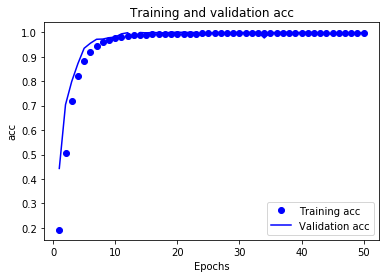

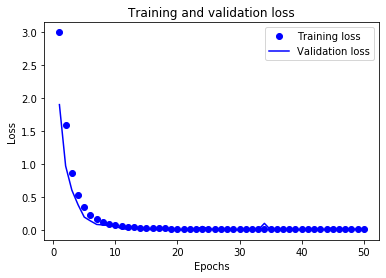

In [0]:


#################################################################################################
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same', input_shape = (window_len,160,ch_number) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(subject_numberT, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])

#################################################################################################
filepath = '/content/drive/My Drive/mymodels/bestmodel_point.h5'
#earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)
ModelCheckpoint_callbacks = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='auto', period=1)
# Train the Model
history = model.fit_generator(epochs =50,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              callbacks=[ModelCheckpoint_callbacks],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
#model.save('/content/drive/My Drive/mymodels/finalmodel_orth_Oz_T7_C3.h5')

In [12]:
model = load_model('/content/drive/My Drive/mymodels/bestmodel_point.h5')
model.summary()
model.pop()
model.pop()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 160, 128)      3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 80, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 78, 256)        295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 39, 256)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 37, 512)        1180160   
____________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


     TrainResult ([loss , acc])= [0.00010601813004244913, 1.0]
ValidationResult ([loss , acc])= [0.00021139885681026248, 1.0]
      TestResult ([loss , acc])= [0.0003442101747798707, 1.0]


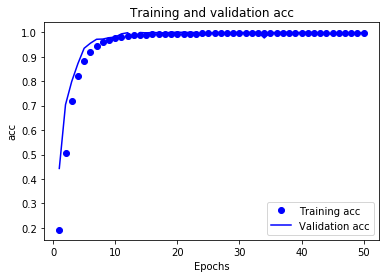

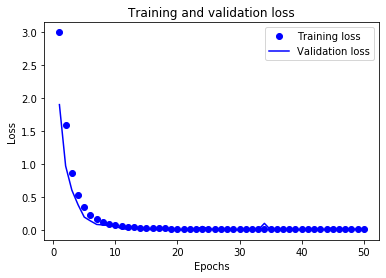

In [0]:
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject


total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)

In [39]:
import h5py
hf = h5py.File('/content/drive/My Drive/mymodels/vectors/bestpointmodel_total_vectors_orth_Oz_T7_C3_160_spw_outrshift16.h5', 'w')
hf.create_dataset('/content/drive/My Drive/mymodels/vectors/dataset_total_vectors', data=total_vector)
hf.close()
hf = h5py.File('/content/drive/My Drive/mymodels/vectors/bestpointmodel_total_vectors_orth_Oz_T7_C3_160_spw_outrshift16.h5', 'r')
vec = hf.get('/content/drive/My Drive/mymodels/vectors/dataset_total_vectors')
vec


<HDF5 dataset "dataset_total_vectors": shape (109, 586, 1024), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
from shapely.geometry import LineString



In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  tryatr="try1_2000_16outr"
  threshold = 0
  pair_number = 2000
  sample_img_num = 40
  Batch_size = 40
  ITER = pair_number //2


  path = "/content/drive/My Drive/Orth_cosian/"+tryatr+" best point model- cosian dist_true ORTH new model" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,15):

      threshold =0.225+ (j*0.01)
      threshold = round(threshold,4)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled = np.arange(subject_img_number)
          #np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled[:sample_img_num]
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled[sample_img_num*2 : sample_img_num *4]

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(subject_img_number)
          #np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled[:sample_img_num]

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(j,') ' ,threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )
  
  x= np.array(list_FRR )
  #f= np.array(list_FRR )
  g= np.array(list_FAR )
  x1 = np.array([0,0.15])
  g1 = np.array([0,0.15])

  plt.figure(figsize=(10,10))

  i= 0
  # zip joins x and y coordinates in pairs
  for a,b in zip(x, g):
      #thr_round = list_threshold[i]
      label = str(i)
      i= i+1

      plt.annotate(label, (a,b))


  plt.plot(x, g)
  plt.plot(x1, g1)

  first_line = LineString(np.column_stack((x, g)))
  second_line = LineString(np.column_stack((x1, g1)))
  intersection = first_line.intersection(second_line)
  plt.plot(intersection,intersection, 'o')
  print(intersection)
 
 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()

  plt.savefig(png_completeName) 
  #bob.measure.plot.det(list_FRR,list_FAR)
  #%matplotlib qt

  print("####" +"sample img num:"+str(sample_img_num) +"_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")")

  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_FAR[j], list_FRR[j] , list_EER[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])



Successfully created the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift16 
1 )  0.235 . 
 91.75 % 
 true_result: 1835 false_result: 165 
 TP: 857 FN: 143 FRR: 0.143 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.08249999999999999 

2 )  0.245 . 
 90.25 % 
 true_result: 1805 false_result: 195 
 TP: 830 FN: 170 FRR: 0.17 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.0975 

3 )  0.255 . 
 90.75 % 
 true_result: 1815 false_result: 185 
 TP: 840 FN: 160 FRR: 0.16 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.0925 

4 )  0.265 . 
 92.9 % 
 true_result: 1858 false_result: 142 
 TP: 890 FN: 110 FRR: 0.11 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.07100000000000001 

5 )  0.275 . 
 93.45 % 
 true_result: 1869 false_result: 131 
 TP: 902 FN: 98 FRR: 0.098 
 TN: 967 FP: 33 FAR: 0.033 
 EER: 0.0655 

6 )  0.285 . 
 93.95 % 
 true_result: 1879 false_result: 121 
 TP: 915 FN: 85 FRR: 0.085 
 TN: 964 FP: 36 FAR: 0.036 
 EER: 0.0605 

7 )

No handles with labels found to put in legend.


14 )  0.365 . 
 94.05 % 
 true_result: 1881 false_result: 119 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 881 FP: 119 FAR: 0.119 
 EER: 0.0595 

POINT (0.04695454545454546 0.04695454545454546)
####sample img num:25_S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 91.15 % 
 true_result: 1823 false_result: 177 
 TP: 850 FN: 150 FRR: 0.15 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.0885 

2 )  0.245 . 
 91.25 % 
 true_result: 1825 false_result: 175 
 TP: 865 FN: 135 FRR: 0.135 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.08750000000000001 

3 )  0.255 . 
 92.1 % 
 true_result: 1842 false_result: 158 
 TP: 867 FN: 133 FRR: 0.133 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.079 

4 )  0.265 . 
 91.65 % 
 true_result: 1833 false_result: 167 
 TP: 873 FN: 127 FRR: 0.127 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.0835 

5 )  0.275 . 
 91.85 % 
 true_result: 1837 false_result: 163 
 TP

No handles with labels found to put in legend.


14 )  0.365 . 
 92.45 % 
 true_result: 1849 false_result: 151 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 849 FP: 151 FAR: 0.151 
 EER: 0.0755 

POINT (0.0596829268292683 0.0596829268292683)
####sample img num:25_S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 85.65 % 
 true_result: 1713 false_result: 287 
 TP: 737 FN: 263 FRR: 0.263 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.14350000000000002 

2 )  0.245 . 
 87.65 % 
 true_result: 1753 false_result: 247 
 TP: 792 FN: 208 FRR: 0.208 
 TN: 961 FP: 39 FAR: 0.039 
 EER: 0.1235 

3 )  0.255 . 
 87.7 % 
 true_result: 1754 false_result: 246 
 TP: 786 FN: 214 FRR: 0.214 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.123 

4 )  0.265 . 
 87.0 % 
 true_result: 1740 false_result: 260 
 TP: 780 FN: 220 FRR: 0.22 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.13 

5 )  0.275 . 
 87.5 % 
 true_result: 1750 false_result: 250 
 TP: 7

No handles with labels found to put in legend.


14 )  0.365 . 
 90.5 % 
 true_result: 1810 false_result: 190 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 858 FP: 142 FAR: 0.142 
 EER: 0.095 

LINESTRING EMPTY
####sample img num:25_S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 86.6 % 
 true_result: 1732 false_result: 268 
 TP: 758 FN: 242 FRR: 0.242 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.134 

2 )  0.245 . 
 88.5 % 
 true_result: 1770 false_result: 230 
 TP: 808 FN: 192 FRR: 0.192 
 TN: 962 FP: 38 FAR: 0.038 
 EER: 0.115 

3 )  0.255 . 
 88.0 % 
 true_result: 1760 false_result: 240 
 TP: 786 FN: 214 FRR: 0.214 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.12 

4 )  0.265 . 
 86.85 % 
 true_result: 1737 false_result: 263 
 TP: 777 FN: 223 FRR: 0.223 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.1315 

5 )  0.275 . 
 87.25 % 
 true_result: 1745 false_result: 255 
 TP: 780 FN: 220 FRR: 0.22 
 TN: 965 FP: 35 FAR:

No handles with labels found to put in legend.


14 )  0.365 . 
 89.55 % 
 true_result: 1791 false_result: 209 
 TP: 954 FN: 46 FRR: 0.046 
 TN: 837 FP: 163 FAR: 0.163 
 EER: 0.10450000000000001 

LINESTRING EMPTY
####sample img num:25_S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 91.1 % 
 true_result: 1822 false_result: 178 
 TP: 834 FN: 166 FRR: 0.166 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.08900000000000001 

2 )  0.245 . 
 91.9 % 
 true_result: 1838 false_result: 162 
 TP: 870 FN: 130 FRR: 0.13 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.081 

3 )  0.255 . 
 91.0 % 
 true_result: 1820 false_result: 180 
 TP: 851 FN: 149 FRR: 0.149 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.09 

4 )  0.265 . 
 90.6 % 
 true_result: 1812 false_result: 188 
 TP: 843 FN: 157 FRR: 0.157 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.094 

5 )  0.275 . 
 91.65 % 
 true_result: 1833 false_result: 167 
 TP: 878 FN: 122 FR

No handles with labels found to put in legend.


14 )  0.365 . 
 92.85 % 
 true_result: 1857 false_result: 143 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 869 FP: 131 FAR: 0.131 
 EER: 0.07150000000000001 

POINT (0.063 0.063)
####sample img num:25_S1(0-108)_S2(0-108)


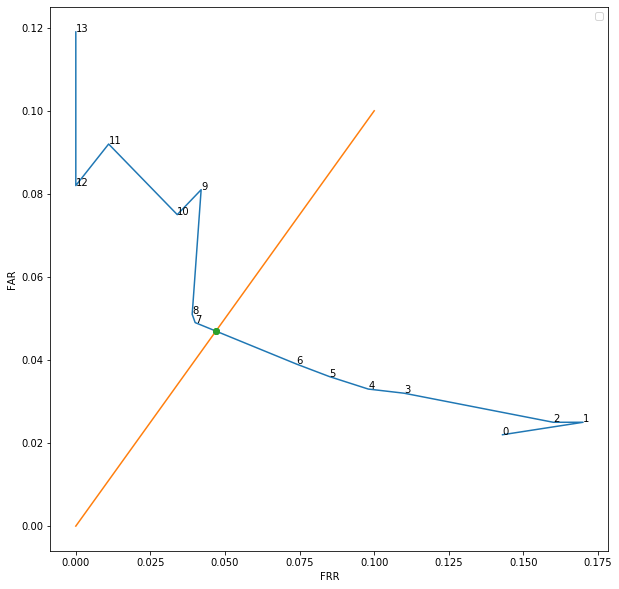

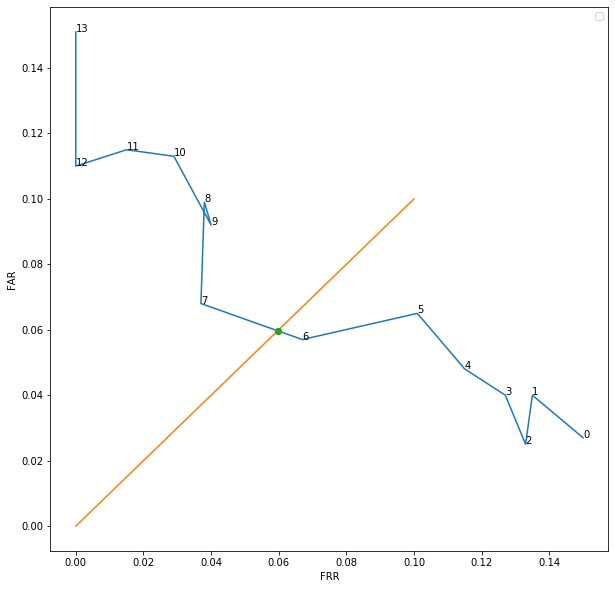

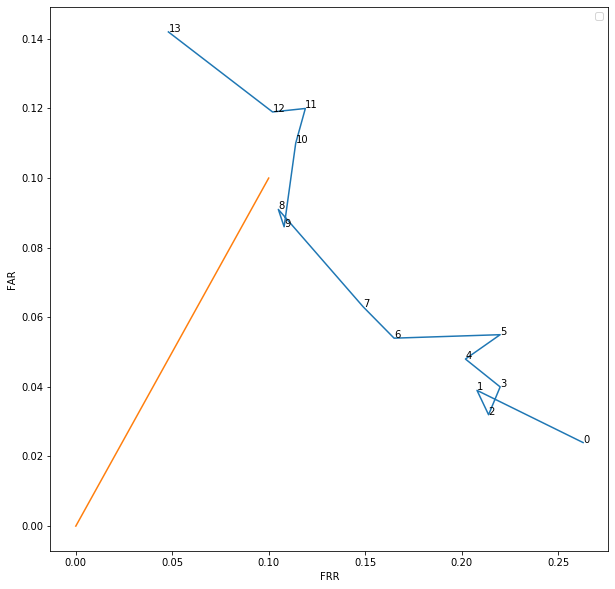

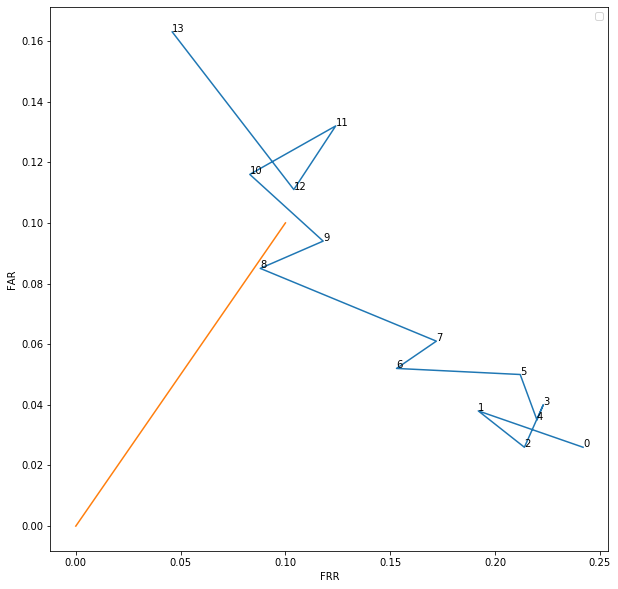

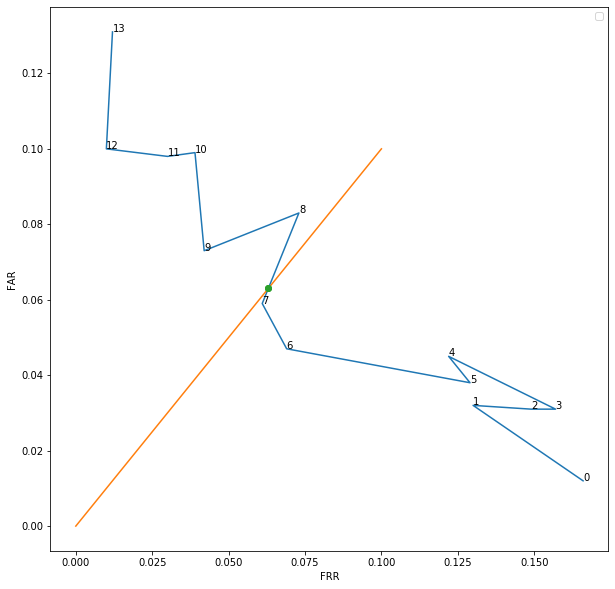

In [45]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model40sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 932 FN: 68 FRR: 0.068 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.0465 

2 )  0.245 . 
 95.55 % 
 true_result: 1911 false_result: 89 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.0445 

3 )  0.255 . 
 95.65 % 
 true_result: 1913 false_result: 87 
 TP: 940 FN: 60 FRR: 0.06 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.0435 

4 )  0.265 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 943 FN: 57 FRR: 0.057 
 TN: 964 FP: 36 FAR: 0.036 
 EER: 0.0465 

5 )  0.275 . 
 96.7 % 
 true_result: 1934 false_result: 66 
 TP: 970 FN: 30 FRR: 0.03 
 TN: 964 FP: 36 FAR: 0.036 
 EER: 0.033 

6 )  0.285 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 968 FP: 32 FAR: 0.032 
 EER: 0.035500000000000004 

7 )  0.295 . 
 95.55 % 
 tru

No handles with labels found to put in legend.


14 )  0.365 . 
 94.5 % 
 true_result: 1890 false_result: 110 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 890 FP: 110 FAR: 0.11 
 EER: 0.055 

MULTIPOINT (0.03415384615384615 0.03415384615384615, 0.036 0.036, 0.039 0.039)
####sample img num:40_S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model40sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 94.7 % 
 true_result: 1894 false_result: 106 
 TP: 920 FN: 80 FRR: 0.08 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.053 

2 )  0.245 . 
 95.1 % 
 true_result: 1902 false_result: 98 
 TP: 933 FN: 67 FRR: 0.067 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.049 

3 )  0.255 . 
 95.3 % 
 true_result: 1906 false_result: 94 
 TP: 943 FN: 57 FRR: 0.057 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.047 

4 )  0.265 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 961 FN: 39 FRR: 0.039 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.0395 

5 )  0.275 . 
 96.15 % 
 true_result: 1923 false_result: 77 

No handles with labels found to put in legend.


14 )  0.365 . 
 94.2 % 
 true_result: 1884 false_result: 116 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 884 FP: 116 FAR: 0.116 
 EER: 0.058 

POINT (0.03985714285714286 0.03985714285714285)
####sample img num:40_S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model40sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 87.95 % 
 true_result: 1759 false_result: 241 
 TP: 783 FN: 217 FRR: 0.217 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.1205 

2 )  0.245 . 
 90.6 % 
 true_result: 1812 false_result: 188 
 TP: 835 FN: 165 FRR: 0.165 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.094 

3 )  0.255 . 
 89.05 % 
 true_result: 1781 false_result: 219 
 TP: 825 FN: 175 FRR: 0.175 
 TN: 956 FP: 44 FAR: 0.044 
 EER: 0.10949999999999999 

4 )  0.265 . 
 90.7 % 
 true_result: 1814 false_result: 186 
 TP: 845 FN: 155 FRR: 0.155 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.093 

5 )  0.275 . 
 92.85 % 
 true_result: 1857 false_result: 143 
 T

No handles with labels found to put in legend.


14 )  0.365 . 
 92.6 % 
 true_result: 1852 false_result: 148 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 852 FP: 148 FAR: 0.148 
 EER: 0.074 

POINT (0.06068 0.06068)
####sample img num:40_S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model40sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 88.9 % 
 true_result: 1778 false_result: 222 
 TP: 789 FN: 211 FRR: 0.211 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.111 

2 )  0.245 . 
 90.5 % 
 true_result: 1810 false_result: 190 
 TP: 829 FN: 171 FRR: 0.171 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.095 

3 )  0.255 . 
 90.2 % 
 true_result: 1804 false_result: 196 
 TP: 835 FN: 165 FRR: 0.165 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.098 

4 )  0.265 . 
 89.9 % 
 true_result: 1798 false_result: 202 
 TP: 835 FN: 165 FRR: 0.165 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.101 

5 )  0.275 . 
 91.65 % 
 true_result: 1833 false_result: 167 
 TP: 884 FN: 116 FRR: 0.116 
 TN: 949 FP: 5

No handles with labels found to put in legend.


14 )  0.365 . 
 92.2 % 
 true_result: 1844 false_result: 156 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 844 FP: 156 FAR: 0.156 
 EER: 0.078 

POINT (0.0589 0.05889999999999999)
####sample img num:40_S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try1_2000_16outr best point model- cosian dist_true ORTH new model40sample num_2000pair_ouer shift16 failed
1 )  0.235 . 
 94.9 % 
 true_result: 1898 false_result: 102 
 TP: 913 FN: 87 FRR: 0.087 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.051 

2 )  0.245 . 
 95.05 % 
 true_result: 1901 false_result: 99 
 TP: 924 FN: 76 FRR: 0.076 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.0495 

3 )  0.255 . 
 95.5 % 
 true_result: 1910 false_result: 90 
 TP: 930 FN: 70 FRR: 0.07 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.045000000000000005 

4 )  0.265 . 
 94.8 % 
 true_result: 1896 false_result: 104 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 967 FP: 33 FAR: 0.033 
 EER: 0.052 

5 )  0.275 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 963 FN: 37 FRR: 0.

No handles with labels found to put in legend.


14 )  0.365 . 
 94.35 % 
 true_result: 1887 false_result: 113 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 887 FP: 113 FAR: 0.113 
 EER: 0.0565 

MULTIPOINT (0.03833333333333334 0.03833333333333333, 0.03870000000000001 0.0387, 0.04409090909090909 0.04409090909090909)
####sample img num:40_S1(0-108)_S2(0-108)


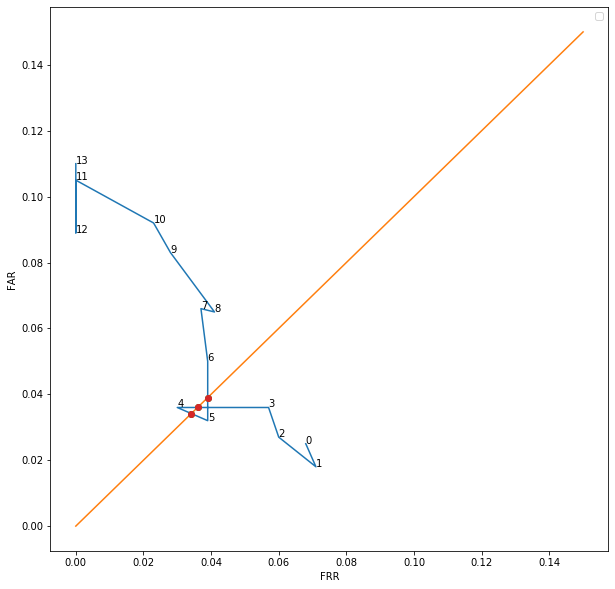

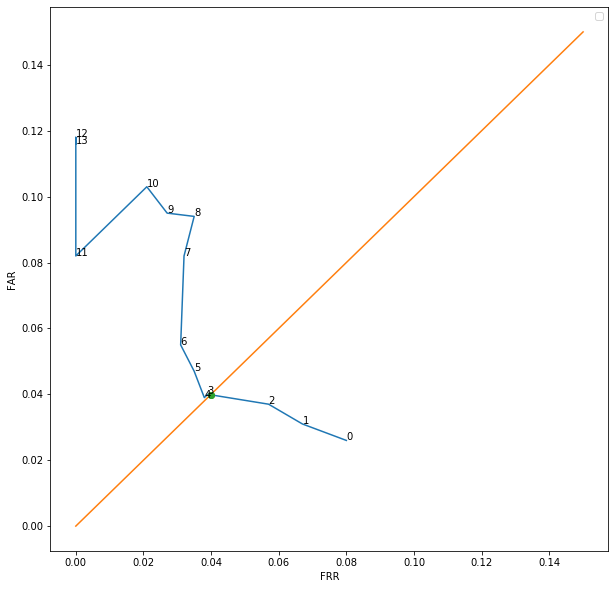

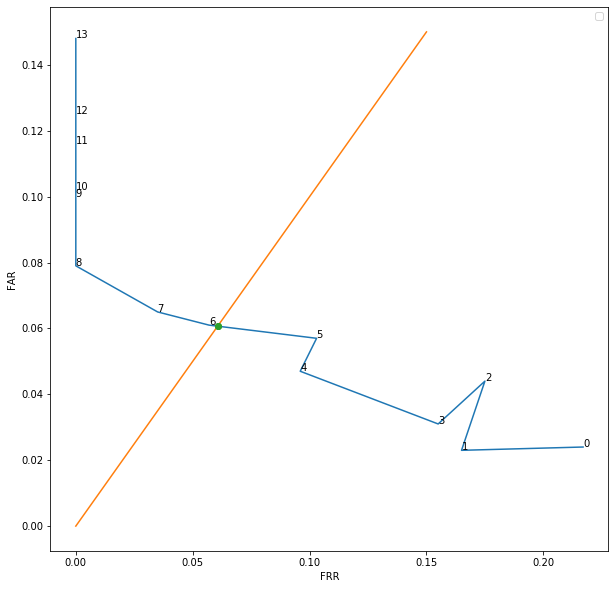

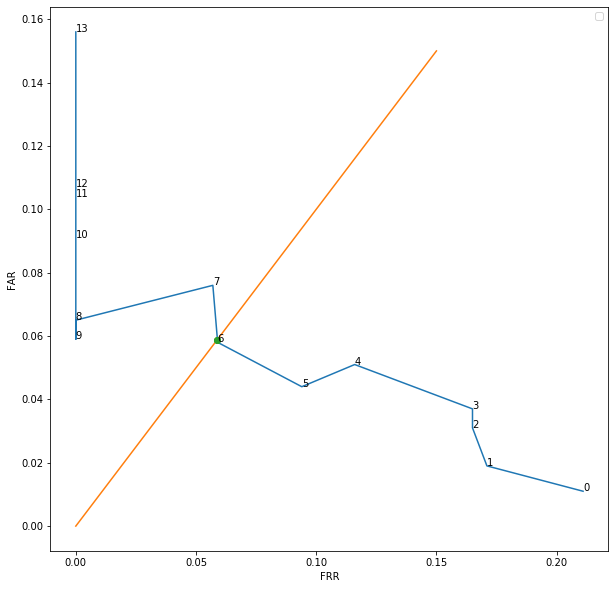

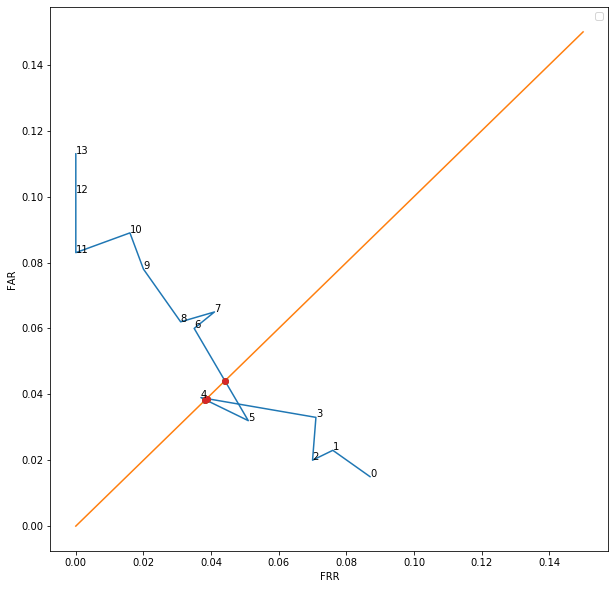

In [49]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)